In [1]:
import fastf1 as ff1
import fastf1.plotting

import seaborn as sns
from matplotlib import pyplot as plt

ff1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

In [3]:
race = ff1.get_session(2023, 13, 'R')
race.load()

core           INFO 	Loading data for Dutch Grand Prix - Race [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '10', '11', '55', '44', '4', '23', '81', '31', '18', '27', '40', '77', '22', '20', '63', '24', '16', '2']


In [6]:
point_finishers = race.drivers[:10]
print(point_finishers)

driver_laps = race.laps.pick_drivers(point_finishers).pick_quicklaps()
driver_laps = driver_laps.reset_index()

['1', '14', '10', '11', '55', '44', '4', '23', '81', '31']


In [8]:
finishing_order = [race.get_driver(i)["Abbreviation"] for i in point_finishers]
print(finishing_order)

['VER', 'ALO', 'GAS', 'PER', 'SAI', 'HAM', 'NOR', 'ALB', 'PIA', 'OCO']


In [10]:
driver_colors = {abv: ff1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in ff1.plotting.DRIVER_TRANSLATE.items()}
print(driver_colors)

{'LEC': '#dc0000', 'SAI': '#ff8181', 'VER': '#0600ef', 'PER': '#716de2', 'PIA': '#ff8700', 'NOR': '#eeb370', 'GAS': '#0090ff', 'OCO': '#70c2ff', 'BOT': '#900000', 'ZHO': '#500000', 'DEV': '#1e3d61', 'TSU': '#356cac', 'RIC': '#2b4562', 'MAG': '#ffffff', 'HUL': '#cacaca', 'ALO': '#006f62', 'STR': '#25a617', 'DRU': '#2f9b90', 'HAM': '#00d2be', 'RUS': '#24ffff', 'ALB': '#005aff', 'SAR': '#012564'}


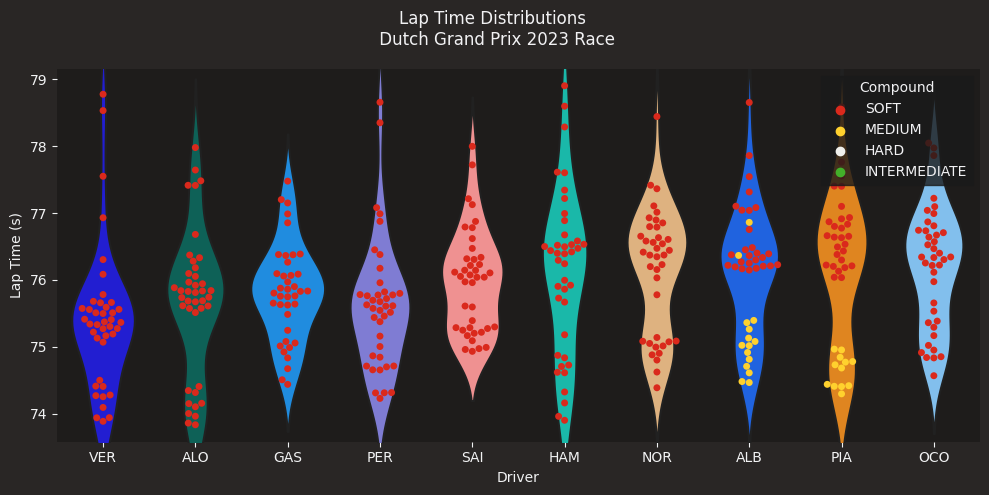

In [16]:
# creating violin plots to show distributions
# them swarm plot to show actual laptimes

# creating the figure
fig, ax = plt.subplots(figsize=(10,5))

# sns doesnt have good timedelta support
# so we have to convert timedelta to float (in sec)
driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="LapTime(s)",
               inner=None,
               scale="area",
               order=finishing_order,
               palette=driver_colors,
              )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="LapTime(s)",
              order=finishing_order,
              hue="Compound",
              palette=ff1.plotting.COMPOUND_COLORS,
              hue_order=["SOFT", "MEDIUM", "HARD", "INTERMEDIATE"],
              linewidth=0,
              size=5,
             )

ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
plt.suptitle(f"Lap Time Distributions \n "
             f"Dutch Grand Prix {race.event.year} Race")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()